<a href="https://colab.research.google.com/github/Mads8760/Ciencia-de-dados/blob/main/Analise_Exploratoria_de_Dados_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('/content/vgsales.csv')
print(df.head())



   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [18]:
# Contar valores ausentes por coluna
valores_ausentes = df.isnull().sum()

# Exibir apenas colunas com valores ausentes
valores_ausentes[valores_ausentes > 0]


,0
Year,271
Publisher,58


In [19]:
# Contar registros duplicados
num_duplicated = df.duplicated().sum()

print(f"Número de registros duplicados: {num_duplicated}")

# Exibir registros duplicados, se houver
if num_duplicated > 0:
    df[df.duplicated()]


Número de registros duplicados: 0


In [20]:
# Verificar os valores ausentes
valores_ausentes = df.isnull().sum()
print("Valores ausentes por coluna:")
print(valores_ausentes[valores_ausentes > 0])

Valores ausentes por coluna:
Year         271
Publisher     58
dtype: int64


In [21]:
# Preencher valores ausentes em colunas categóricas com "desconhecido"
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna("desconhecido")

df = df.drop(columns=['Publisher'])

# Verificar se os valores ausentes foram tratados
print("Valores ausentes após tratamento:")
print(df.isnull().sum().sum())


Valores ausentes após tratamento:
271


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.3+ MB


In [30]:

df['Year'] = df['Year'].fillna(df['Year'].median())
df.head(50)

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,28.31


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.3+ MB


In [31]:
df['Year'] = df['Year'].astype(int)
df.head(20)

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31


In [58]:
# Verificar as datas mínimas e máximas no dataset
print("Ano mínimo:", df['Year'].min())
print("Ano máximo:", df['Year'].max())

# Contar quantos dias distintos existem
ano_unico = df['Year'].nunique()
print(f"Número de ano distintos no dataset: {ano_unico}")

Ano mínimo: 1980
Ano máximo: 2020
Número de ano distintos no dataset: 39


In [33]:
# Verificar novamente os valores ausentes
valores_ausentes = df.isnull().sum()
print("Valores ausentes por coluna:")
print(valores_ausentes[valores_ausentes > 0])

Valores ausentes por coluna:
Series([], dtype: int64)


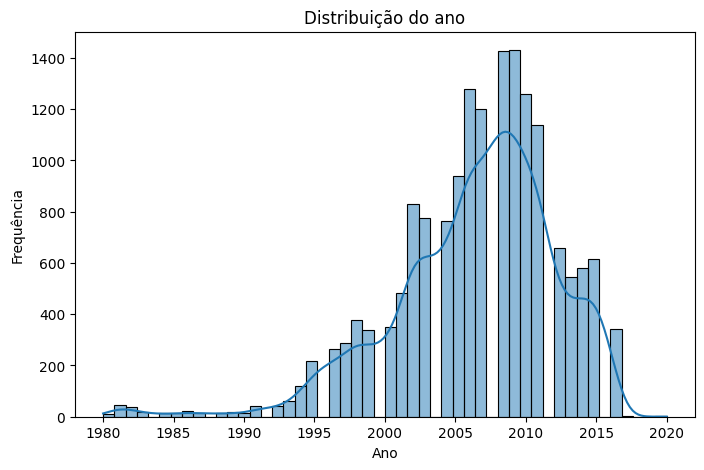

In [34]:
# Criar um histograma para visualizar a distribuição do Ano
plt.figure(figsize=(8, 5))
sns.histplot(df['Year'], bins=50, kde=True)
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.title('Distribuição do ano')
plt.show()

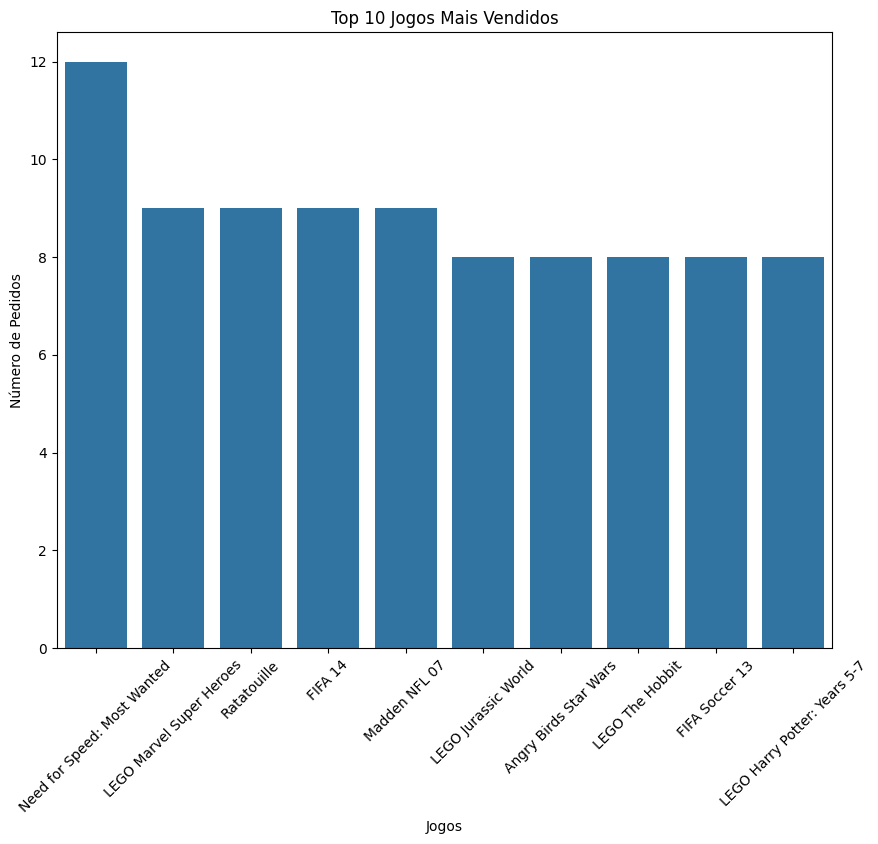

In [49]:
# Contar os jogos mais vendidos
top_categorias = df['Name'].value_counts().head(10)

# Criar um gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x=top_categorias.index, y=top_categorias.values)
plt.xlabel('Jogos')
plt.ylabel('Número de Pedidos')
plt.title('Top 10 Jogos Mais Vendidos')
plt.xticks(rotation=45)
plt.show()


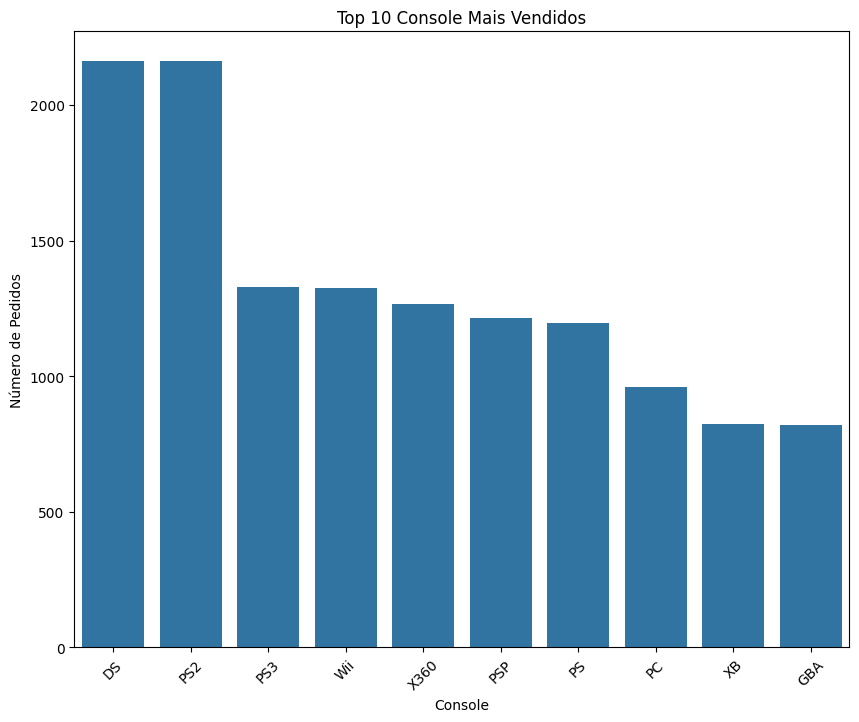

In [51]:
# Contar os consoles mais vendidos
top_categorias = df['Platform'].value_counts().head(10)

# Criar um gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x=top_categorias.index, y=top_categorias.values)
plt.xlabel('Console')
plt.ylabel('Número de Pedidos')
plt.title('Top 10 Console Mais Vendidos')
plt.xticks(rotation=45)
plt.show()


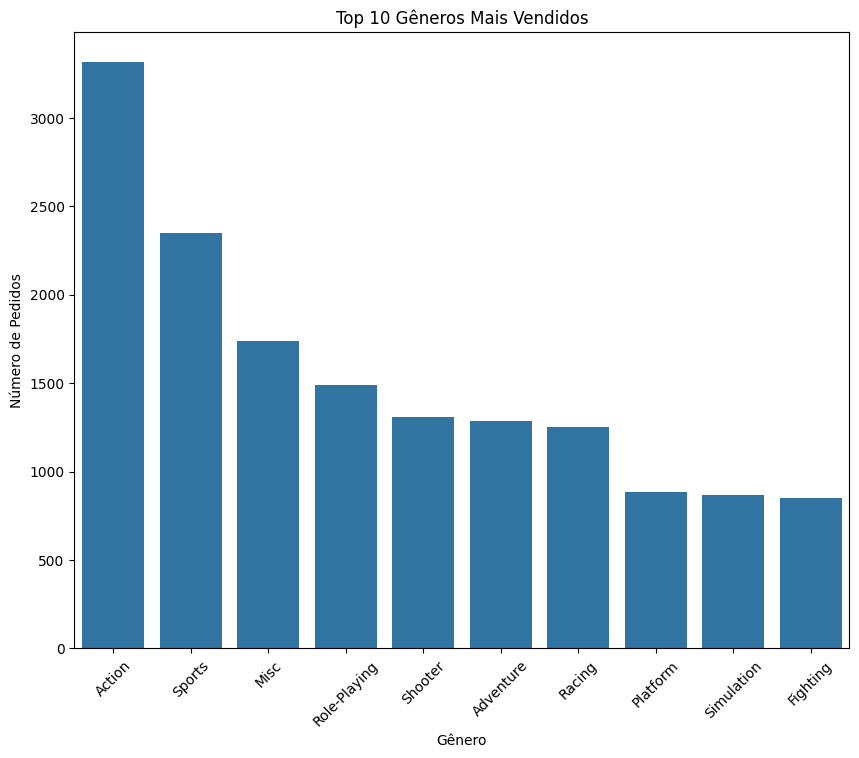

In [53]:
# Contar as categorias de gêneros mais vendidos
top_categorias = df['Genre'].value_counts().head(10)

# Criar um gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x=top_categorias.index, y=top_categorias.values)
plt.xlabel('Gênero')
plt.ylabel('Número de Pedidos')
plt.title('Top 10 Gêneros Mais Vendidos')
plt.xticks(rotation=45)
plt.show()
